# Policing data


1.Download dataset  from  kaggle.

2.Open your python environment.

3.Move the files into same directory as your notebook.

4.Read the files into pandas(using read_csv)

5.Read about the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

# Preparing the data

1. Examine the data

2. Clean the data

In [3]:
p_d = pd.read_csv("police_project.csv") # police data

In [4]:
p_d.head() # by default return the first 5 rows

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


•	Each row represents one traffic stop.

•	NaN values represent the missing values.


In [5]:
p_d.tail() # by default return the last 5 rows

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
p_d.shape  # shape attributes represent the rows and column of the data

(91741, 15)

# Locating missing Values

In [7]:
p_d.isnull() # detecting missing values
p_d.isnull().sum() # .sum() calculates the sum of each column
# True = 1 ,False =0

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Dropping Column  that only contains  missing values.

In [8]:
p_d.drop("county_name", axis = 1, inplace = True)
#p_d.dropna(axis="columns",how ="all" or how ="any" ,inlpace =True)

In [9]:
p_d.shape

(91741, 14)

In [10]:
p_d.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

#  Do the men or women speed more often?

driver_gender,violation


In [12]:
p_d[p_d.violation=="Speeding"].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [13]:
p_d[p_d.driver_gender == "M"].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [14]:
p_d[p_d.driver_gender == "F"].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [16]:
a=p_d.groupby(["driver_gender"]).violation.value_counts(normalize=True).unstack()

In [17]:
a

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


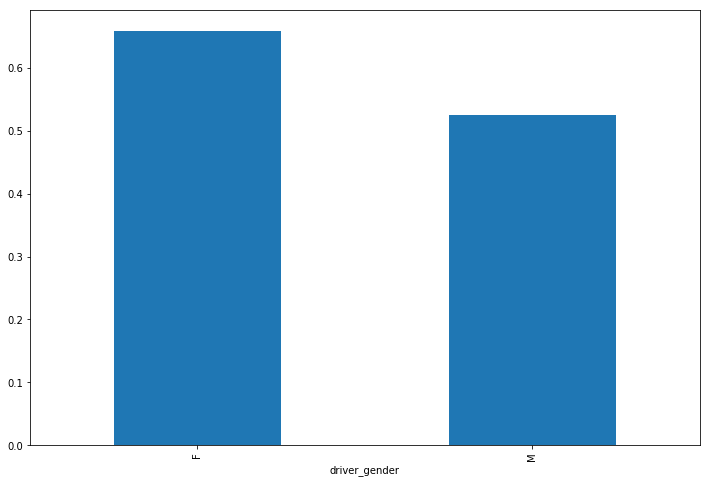

In [18]:
plt.figure(figsize=(12, 8))
a.Speeding.plot(kind="bar")

# Which year had the least number of stops?

In [19]:
p_d.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
5        2005-03-23
6        2005-04-01
7        2005-06-06
8        2005-07-13
9        2005-07-13
10       2005-07-13
11       2005-07-13
12       2005-07-14
13       2005-07-18
14       2005-07-18
15       2005-07-19
16       2005-07-19
17       2005-07-19
18       2005-07-20
19       2005-07-24
20       2005-07-28
21       2005-08-07
22       2005-08-08
23       2005-08-18
24       2005-08-28
25       2005-09-03
26       2005-09-17
27       2005-09-21
28       2005-09-22
29       2005-09-26
            ...    
91711    2015-12-30
91712    2015-12-30
91713    2015-12-30
91714    2015-12-30
91715    2015-12-30
91716    2015-12-30
91717    2015-12-31
91718    2015-12-31
91719    2015-12-31
91720    2015-12-31
91721    2015-12-31
91722    2015-12-31
91723    2015-12-31
91724    2015-12-31
91725    2015-12-31
91726    2015-12-31
91727    2015-12-31
91728    2015-12-31
91729    2015-12-31


In [20]:
p_d['stop_date'] = pd.to_datetime(p_d.stop_date, format="%Y-%M-%d")
p_d["year"] = p_d.stop_date.dt.year

In [21]:
p_d.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [22]:

p_d.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

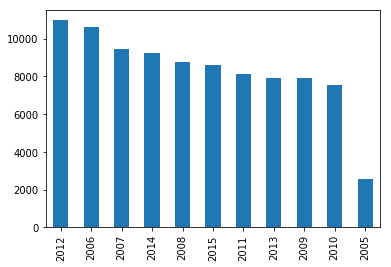

In [23]:

#plt.figure(figsize=(8, 8))
p_d.year.value_counts().plot(kind="bar")

# assignment

#  Does gender affect who gets searched during a stop?


# Do most stops occur at night?